## Drosophila Examples for Pairwise Alignment

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
import sys
import morpho
sys.path.insert(0,'../') cvcvcvcvcvcvcv
import matplotlib.pyplot as plt
import scanpy
import numpy as np
from jupyterthemes import jtplot
jtplot.style(theme="onedork")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
slice_colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3']
%load_ext autoreload
%autoreload 2

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [3]:
data_dir='../data/cellbin_h5ad'
slices = [scanpy.read_h5ad(os.path.join(data_dir, "E8-10_b_S{:0>2d}.h5ad".format(index))) for index in range(5,16)]

### Exact Alignment on CPU

In [4]:
i = 2
BAS_slices = [slice.copy() for slice in slices]
sliceA = BAS_slices[i]
sliceB = BAS_slices[i + 1]
align_model_A, align_model_B, P, vecfld = morpho.morpho_align_pairwise(
            model_ref=sliceA,
            model=sliceB,
            spatial_key="spatial",
            key_added="align_spatial",
            select_high_exp_genes=False,
            normalize_c=True,
            normalize_g=False,
            mode="SN",
            device="1",
            max_iter=100,
            dtype='float64',
            beta2=0.1,
            verbose=True,
            iter_key_added='iter_spatial',
            keep_size=False,
        )

|-----> Start alignment based on morph, mode: SN.
|-----> Filtered all samples for common genes. There are 7510 common genes.
|-----> Coordinates normalization params:
|-----------> Scale: 184.06246531364832.
|-----> [Start morpho alignment] in progress: 100.0000%
|-----> [Start morpho alignment] finished [0.5484s]


In [6]:
target_velocities = morpho.velocities(
    vecfld=vecfld, 
    quary_points=sliceB.obsm['spatial'],
    device="1",
    dtype='float64',
)

In [7]:
target_velocities

array([[  -8.23199146,  -54.11879072],
       [  -9.32947733,  -53.82489359],
       [  -7.96172556,  -55.17869658],
       ...,
       [ -71.53614628, -120.09353427],
       [ -73.02023332, -119.66575186],
       [ -75.83860428, -118.26020547]])

In [5]:
vecfld

{'s': array(0.99919135),
 'R': array([[ 0.99610488,  0.08817639],
        [-0.08817639,  0.99610488]]),
 't': array([-0.00038279, -0.03179687]),
 'Coff': array([[  5.28695386,  -0.32901602],
        [ -3.61741669,   0.68833673],
        [  3.63755722, -10.88795634],
        [ -0.59721533,  -0.72969372],
        [ 18.46356699, -13.60604454],
        [  6.78336241,  -7.06344139],
        [-12.45400616,   8.73285947],
        [  3.44352209,   3.32912215],
        [  2.83796208,   4.06293442],
        [ -7.39163516,   6.52569084],
        [ -5.25359093,   2.1992275 ],
        [ -0.19748948,   0.47005068],
        [-10.20493953,  12.76180613],
        [ -2.49036221,  -5.11728572],
        [  1.72676   ,  -1.0244579 ]]),
 'ctrl_pts': array([[ 1.08777971,  0.61000552],
        [ 1.0748381 ,  0.81286966],
        [ 1.12713397,  0.27035106],
        [-1.17735556,  0.55267514],
        [-0.03350705, -0.39388661],
        [-0.77416055,  0.08672352],
        [-0.45426972, -0.12336714],
        [-1

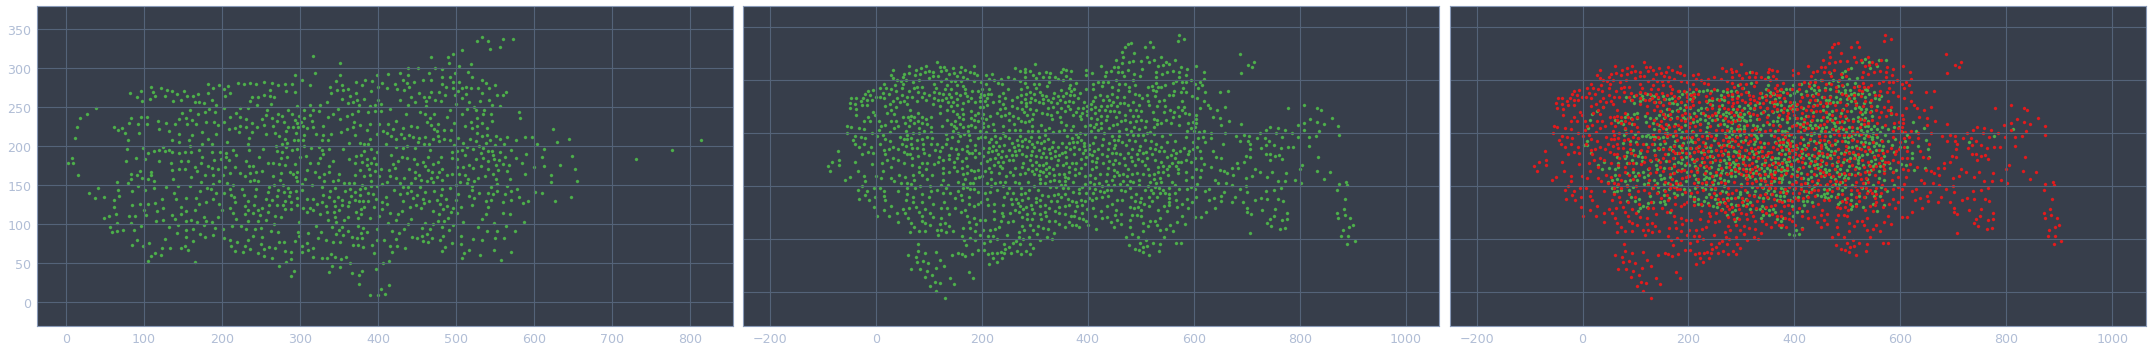

In [60]:
%matplotlib inline
fig, ax = plt.subplots(1, 3,figsize=(30,5))
plot_slices(align_model_A, align_model_B,ax,'align_spatial',slice_colors, 10)
plt.tight_layout()
plt.show()

In [61]:
BAS_slices = [slice.copy() for slice in slices]
align_models = morpho.morpho_align(
            models=BAS_slices,
            spatial_key="spatial",
            key_added="align_spatial",
            iter_key_added='iter_spatial',
            select_high_exp_genes=False,
            normalize_c=True,
            normalize_g=False,
            mode="SN",
            device="2",
            max_iter=100,
            dtype='float64',
            beta2=0.1,
            verbose=True,
            )

|-----> [Models alignment] in progress: 10.0000%|-----> Filtered all samples for common genes. There are 5266 common genes.
|-----> Coordinates normalization params:
|-----------> Scale: 148.19633305798916.
|-----> [Start morpho alignment] in progress: 100.0000%
|-----> [Start morpho alignment] finished [0.4735s]
|-----> [Models alignment] in progress: 20.0000%|-----> Filtered all samples for common genes. There are 7127 common genes.
|-----> Coordinates normalization params:
|-----------> Scale: 160.84777521497458.
|-----> [Start morpho alignment] in progress: 100.0000%
|-----> [Start morpho alignment] finished [0.3877s]
|-----> [Models alignment] in progress: 30.0000%|-----> Filtered all samples for common genes. There are 7510 common genes.
|-----> Coordinates normalization params:
|-----------> Scale: 183.99564074910327.
|-----> [Start morpho alignment] in progress: 100.0000%
|-----> [Start morpho alignment] finished [0.5861s]
|-----> [Models alignment] in progress: 40.0000%|----->

In [25]:
morpho.two_d_pairwise_animate(
    model_ref=align_model_A,
    model=align_model_B,
    fps=20
)

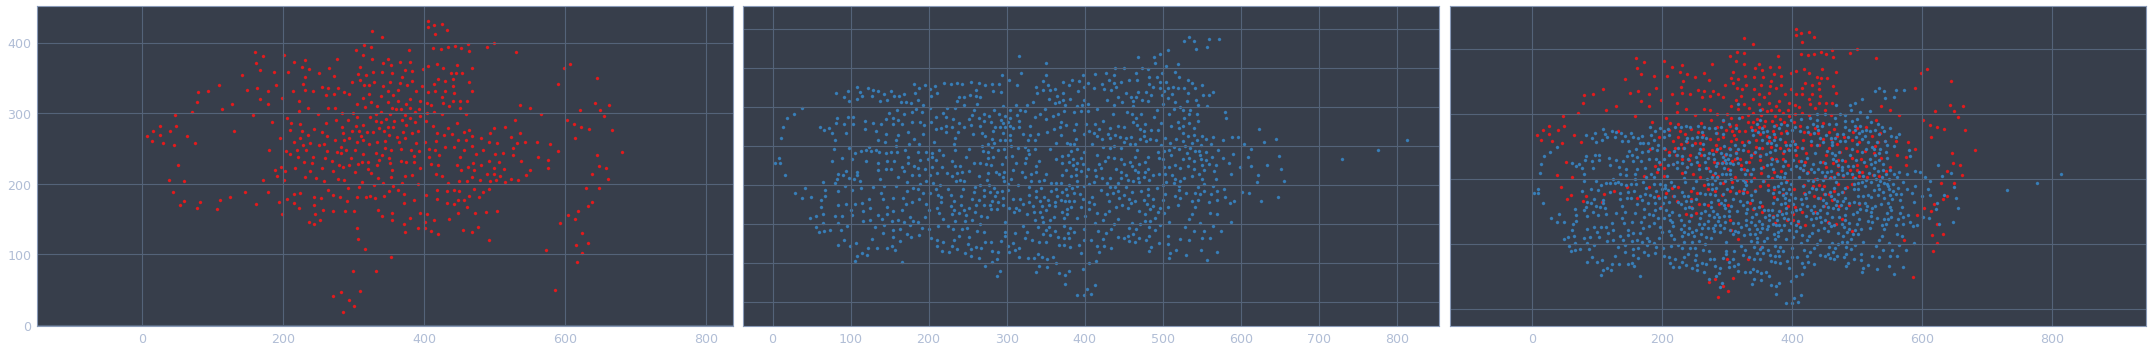

In [63]:
%matplotlib inline
fig, axs = plt.subplots(1, 3,figsize=(30,5))
morpho.plot_pairewise_slices(
    sliceA_align=align_model_A,
    sliceB_align=align_model_B,
    axs = axs,
    spatial_key='spatial',
    )


In [16]:
%matplotlib auto
i = 9
BAS_slices = [slice.copy() for slice in slices]
sliceA = BAS_slices[i]
sliceB = BAS_slices[i + 1]
align_models = morpho.morpho_align(
            models=BAS_slices,
            spatial_key="spatial",
            key_added="align_spatial",
            select_high_exp_genes=False,
            normalize_c=True,
            normalize_g=False,
            mode="SN",
            device="2",
            max_iter=100,
            dtype='float64',
            beta2=0.1,
            verbose=True,
            )

Using matplotlib backend: agg


IndexError: list index out of range

In [5]:
BAS_slices = [slice.copy() for slice in slices]
align_models, coarse_align_models = morpho.morpho_align_global(
            models=BAS_slices,
            spatial_key="spatial",
            key_added="align_spatial",
            select_high_exp_genes=False,
            normalize_c=True,
            normalize_g=False,
            mode="SN",
            device="2",
            max_iter=100,
            dtype='float64',
            beta2=0.1,
            verbose=True,
            )

|-----> [Start morpho coarse alignment] in progress: 100.0000%
|-----> [Start morpho coarse alignment] finished [11.2264s]
|-----> Filtered all samples for common genes. There are 5139 common genes.
|-----> Coordinates normalization params:
|-----------> Scale: 1085.3485459960702.
|-----> [Start morpho fine alignment] in progress: 100.0000%
|-----> [Start morpho fine alignment] finished [47.6294s]


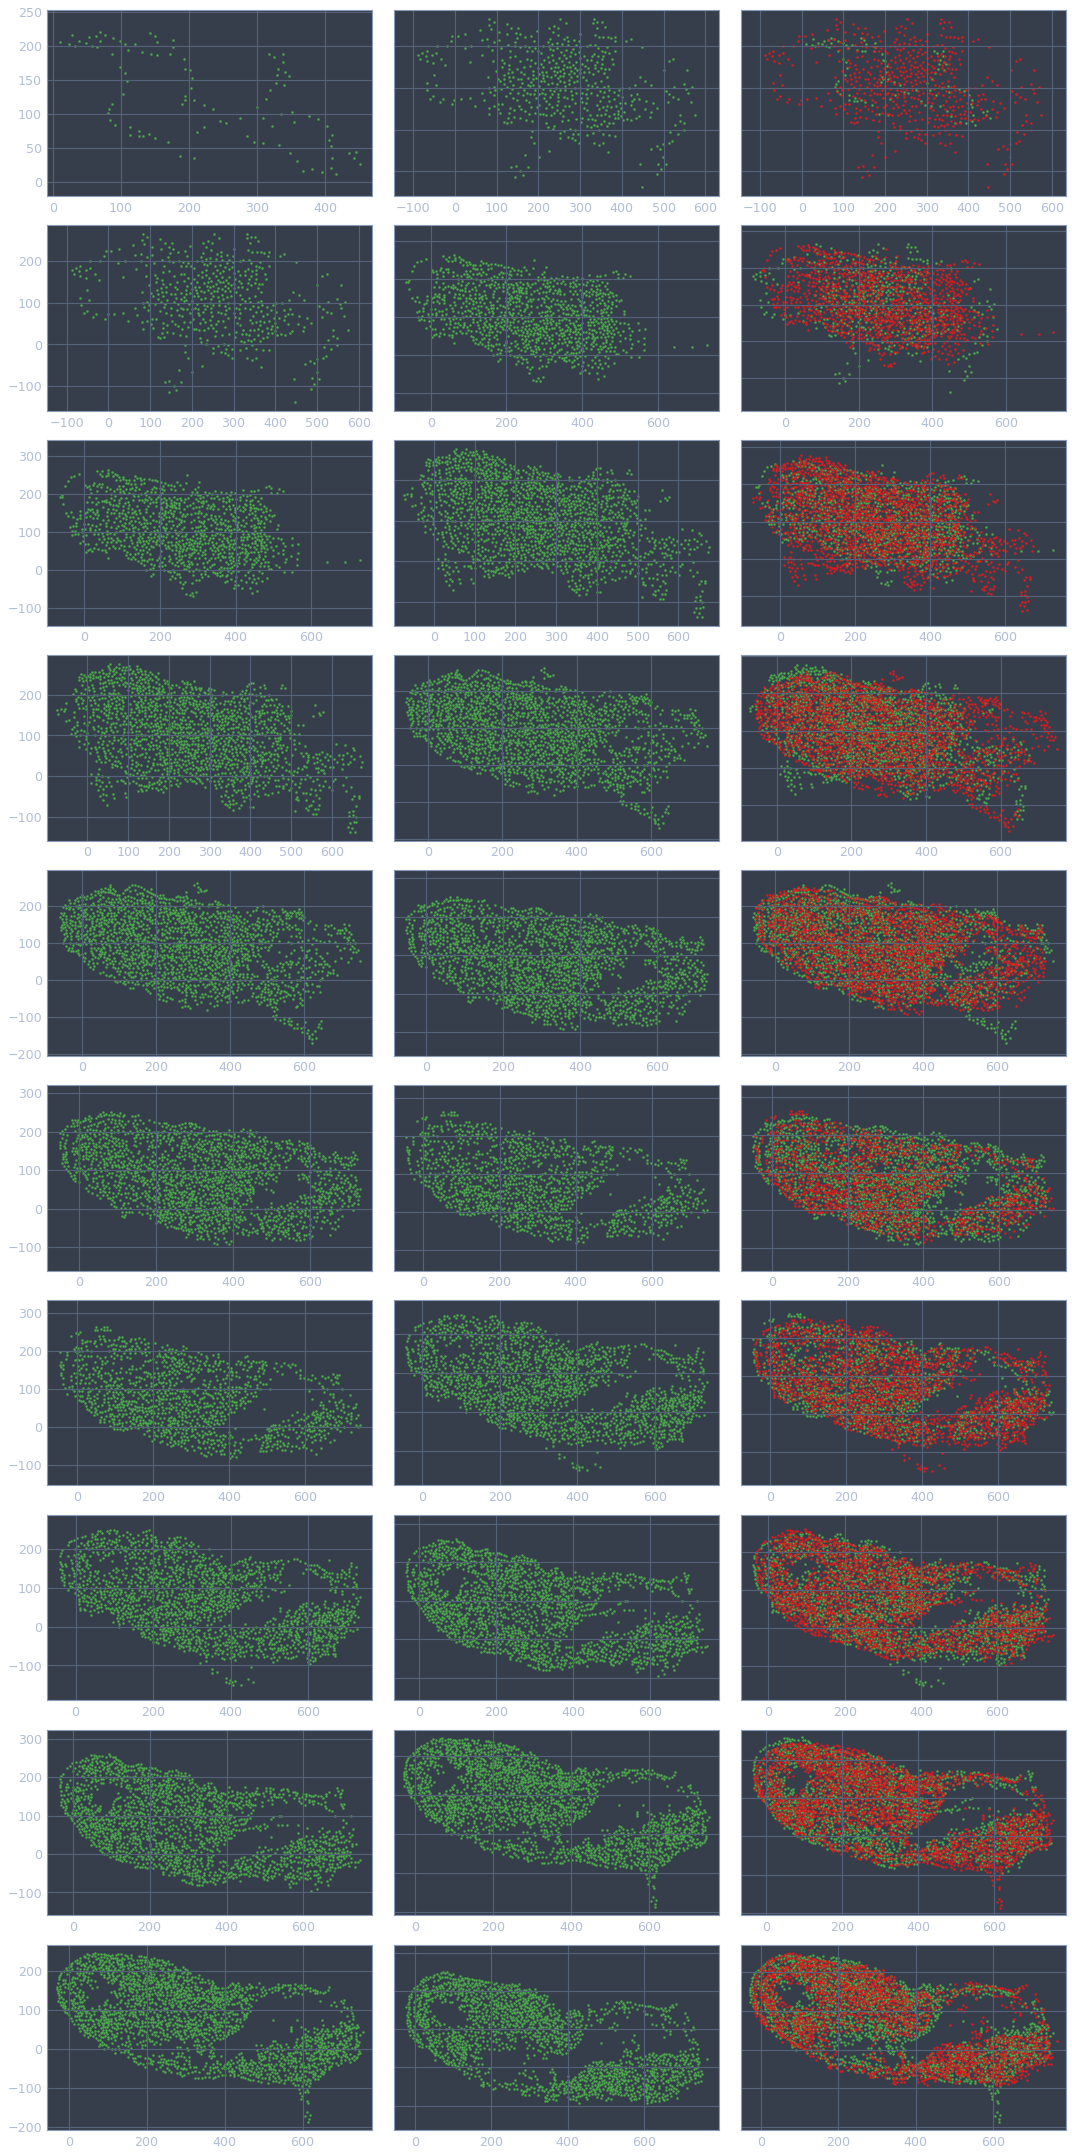

In [11]:
%matplotlib inline
fig, axs = plt.subplots(len(coarse_align_models)-1, 3,figsize=(15,(len(coarse_align_models)-1)*3))
for i in range(len(coarse_align_models)-1):
    sliceA = coarse_align_models[i]
    sliceB = coarse_align_models[i + 1]
    plot_slices(sliceA, sliceB,axs[i],'align_spatial',slice_colors,5)
plt.tight_layout()
plt.show()


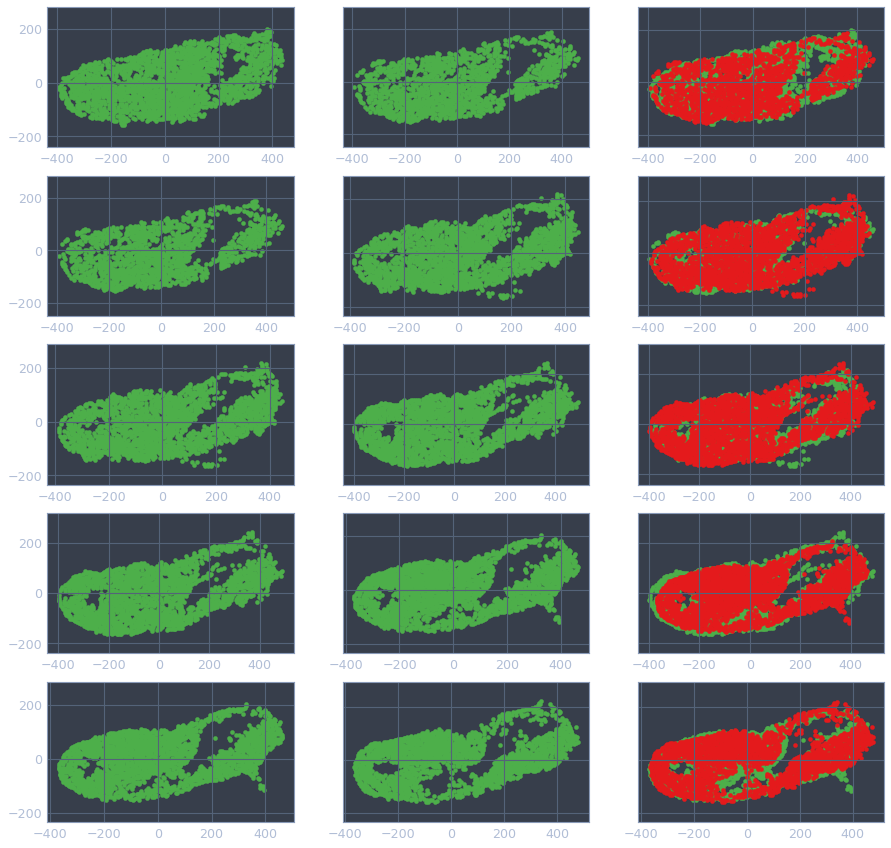

In [44]:
%matplotlib inline
fig, axs = plt.subplots(len(align_models)-1, 3,figsize=(15,(len(align_models)-1)*3))
for i in range(len(align_models)-1):
    sliceA = align_models[i]
    sliceB = align_models[i + 1]
    plot_slices(sliceA, sliceB,axs[i],'align_spatial',slice_colors,20)


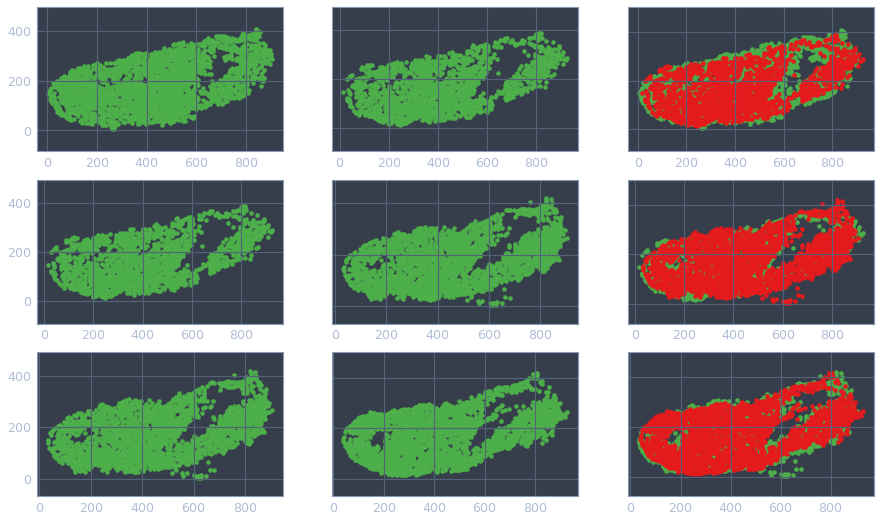

In [52]:
%matplotlib inline
fig, axs = plt.subplots(len(coarse_align_models)-1, 3,figsize=(15,(len(coarse_align_models)-1)*3))
for i in range(len(coarse_align_models)-1):
    sliceA = coarse_align_models[i]
    sliceB = coarse_align_models[i + 1]
    plot_slices(sliceA, sliceB,axs[i],'align_spatial',slice_colors,20)


In [45]:
%matplotlib inline
morpho.plot_multi_slices(
    align_models,
    spatial_key='align_spatial'
    )


AttributeError: module 'morpho' has no attribute 'plot_multi_slices'

In [44]:
align_models_PASTE = morpho.models_align(
        models=BAS_slices,
        spatial_key="spatial",
        key_added="align_spatial",
        device='0',
    )

|-----> [Models alignment] in progress: 4.1667%|-----> Filtered all samples for common genes. There are 5266 common genes.
|-----> [Models alignment] in progress: 8.3333%|-----> Filtered all samples for common genes. There are 7127 common genes.
|-----> [Models alignment] in progress: 12.5000%|-----> Filtered all samples for common genes. There are 7510 common genes.
|-----> [Models alignment] in progress: 16.6667%|-----> Filtered all samples for common genes. There are 7776 common genes.
|-----> [Models alignment] in progress: 20.8333%|-----> Filtered all samples for common genes. There are 8334 common genes.
|-----> [Models alignment] in progress: 25.0000%|-----> Filtered all samples for common genes. There are 8257 common genes.
|-----> [Models alignment] in progress: 29.1667%|-----> Filtered all samples for common genes. There are 8251 common genes.
|-----> [Models alignment] in progress: 33.3333%|-----> Filtered all samples for common genes. There are 8331 common genes.
|-----> [M

RESULT MIGHT BE INACURATE
Max number of iteration reached, currently 100000. Sometimes iterations go on in cycle even though the solution has been reached, to check if it's the case here have a look at the minimal reduced cost. If it is very close to machine precision, you might actually have the correct solution, if not try setting the maximum number of iterations a bit higher
/home/timer/anaconda3/envs/lyf_Bio/lib/python3.8/site-packages/POT-0.8.2-py3.8-linux-x86_64.egg/ot/lp/__init__.py:343: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


|-----> [Models alignment] in progress: 91.6667%|-----> Filtered all samples for common genes. There are 6615 common genes.
|-----> [Models alignment] in progress: 95.8333%|-----> Filtered all samples for common genes. There are 6223 common genes.
|-----> [Models alignment] in progress: 100.0000%|-----> Filtered all samples for common genes. There are 5867 common genes.
|-----> [Models alignment] in progress: 100.0000%
|-----> [Models alignment] finished [111.9679s]


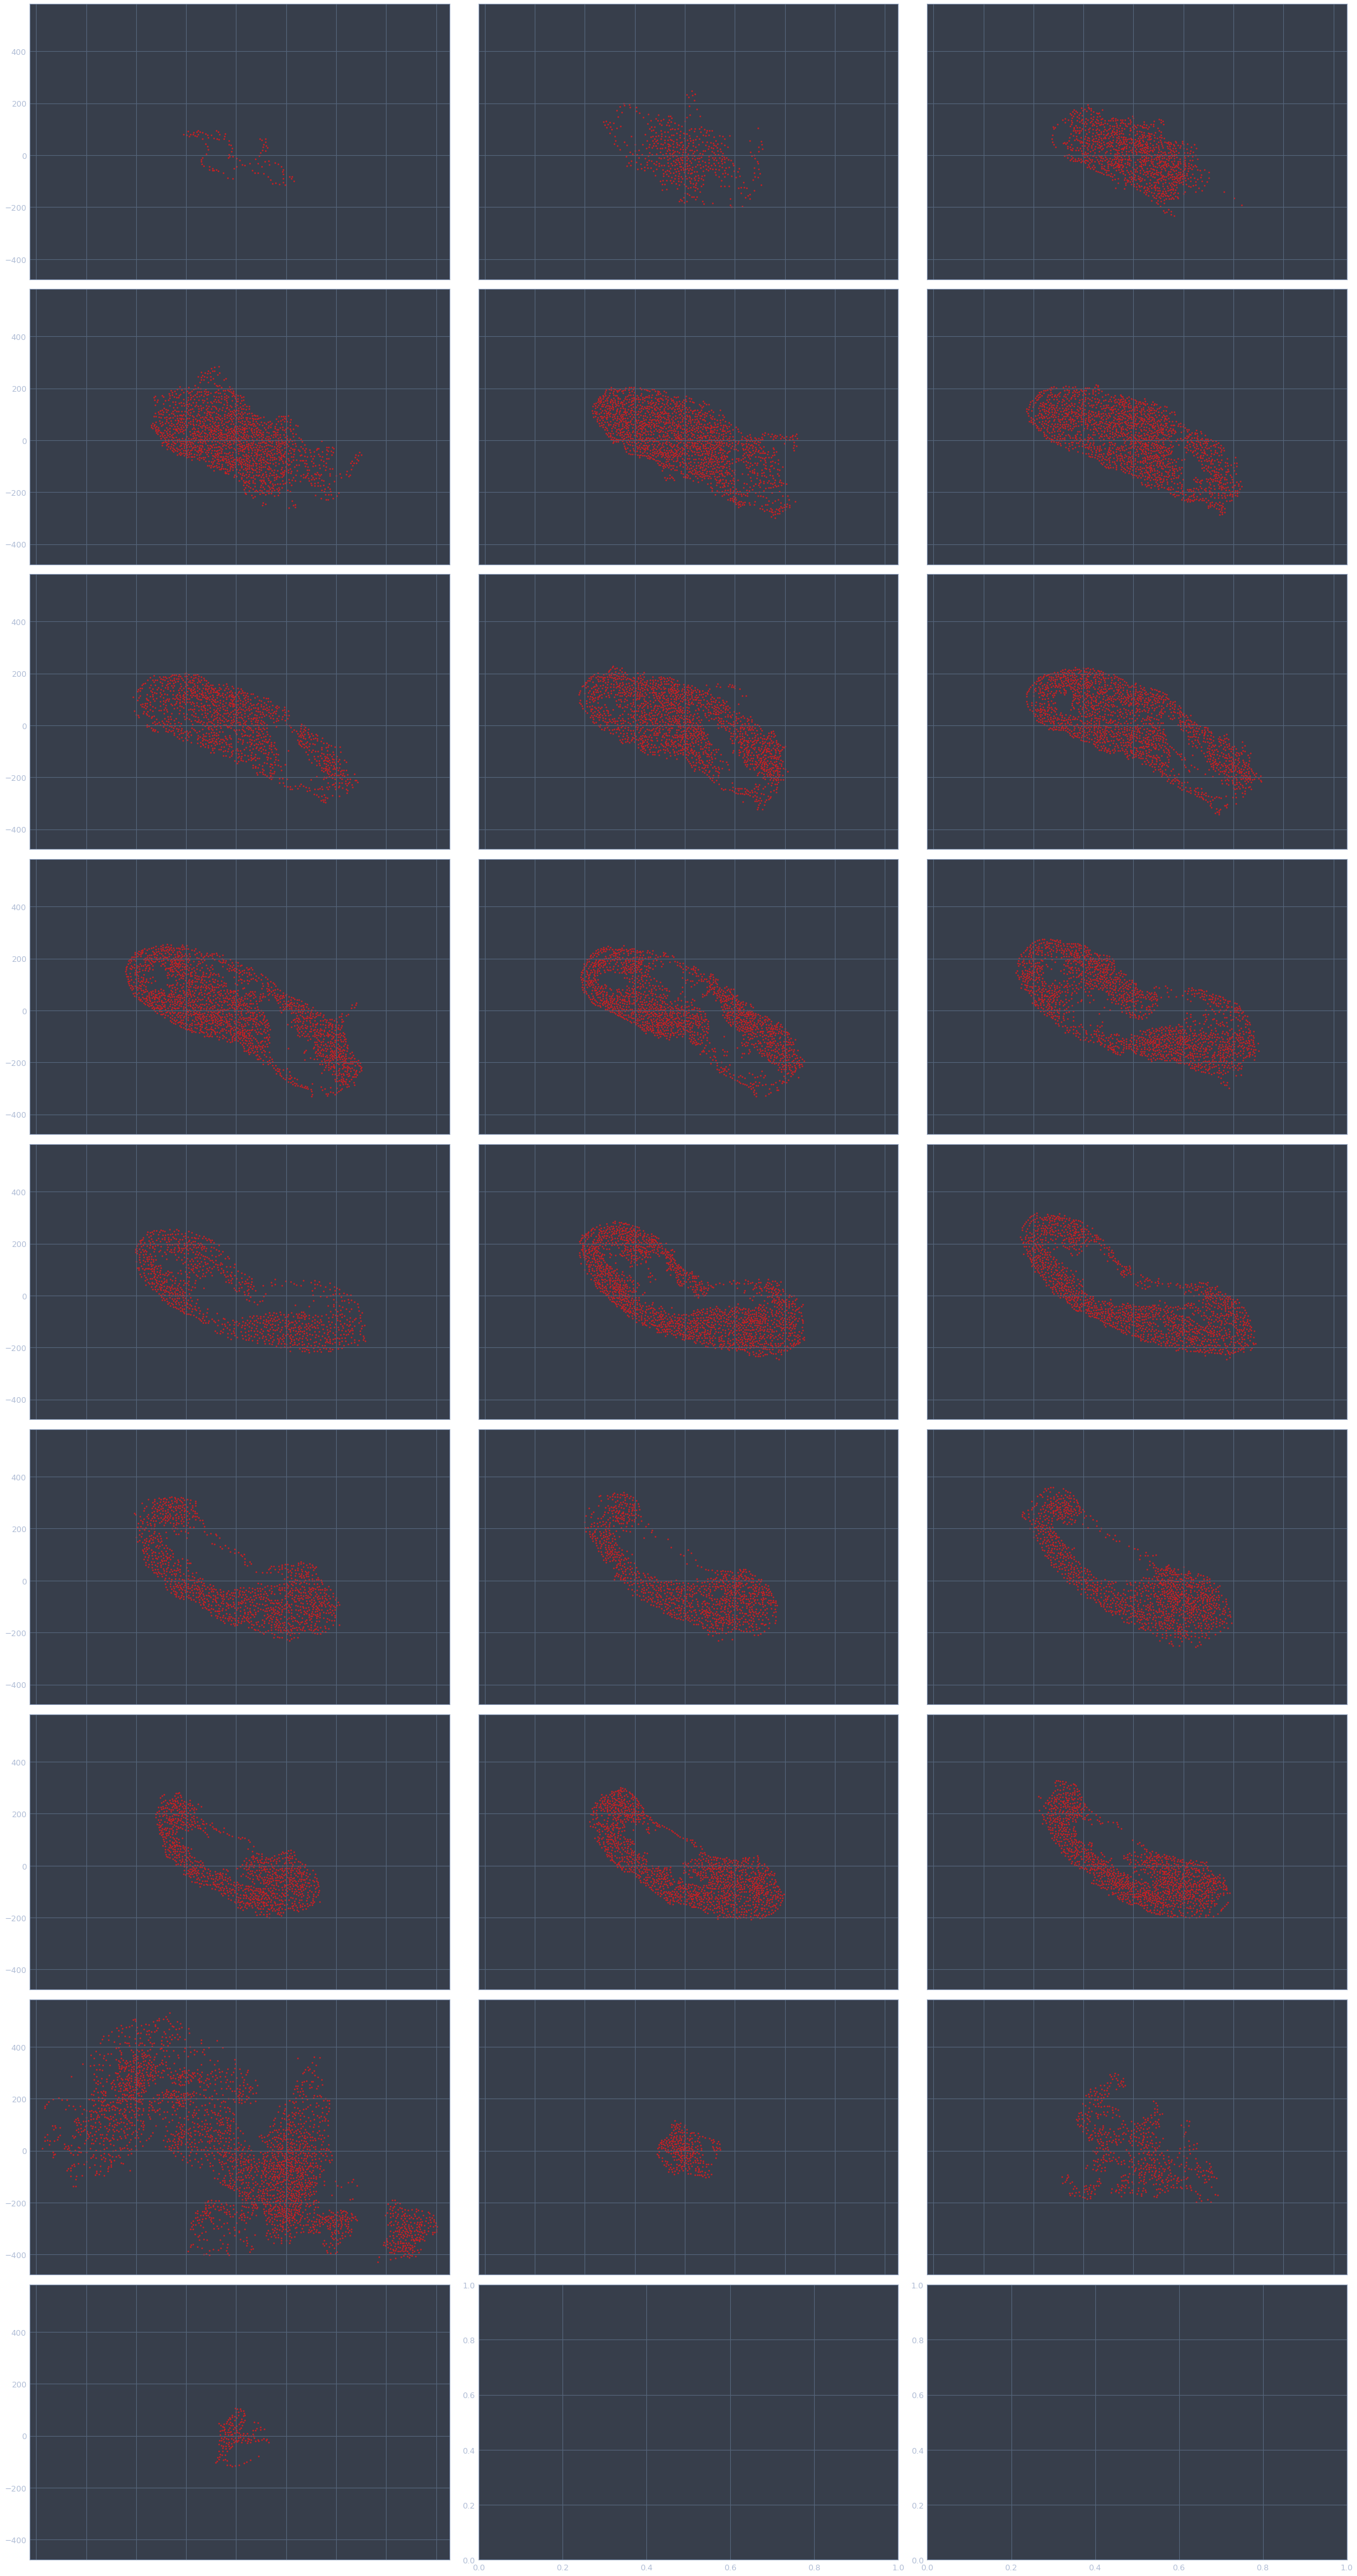

In [45]:
%matplotlib inline
morpho.plot_multi_slices(
    align_models_PASTE,
    spatial_key='align_spatial'
    )


NameError: name 'plot_slices' is not defined

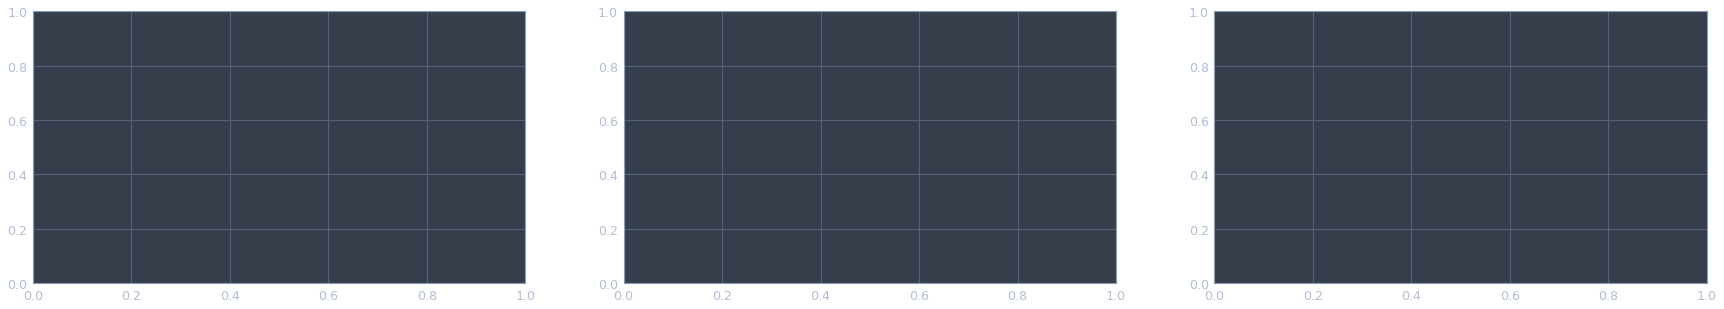

In [23]:
%matplotlib inline
fig, ax = plt.subplots(1, 3,figsize=(30,5))
plot_slices(align_models[0], align_models[1],ax,'align_spatial',slice_colors, 10)
plt.tight_layout()
plt.show()

|-----> Start alignment based on morph, mode: SN.
|-----> Filtered all samples for common genes. There are 5266 common genes.
|-----> Start alignment based on morph, mode: SN.
|-----> Filtered all samples for common genes. There are 7127 common genes.
|-----> Start alignment based on morph, mode: SN.
|-----> Filtered all samples for common genes. There are 7510 common genes.
|-----> Start alignment based on morph, mode: SN.
|-----> Filtered all samples for common genes. There are 7776 common genes.
|-----> Start alignment based on morph, mode: SN.
|-----> Filtered all samples for common genes. There are 8334 common genes.
|-----> Start alignment based on morph, mode: SN.
|-----> Filtered all samples for common genes. There are 8257 common genes.
|-----> Start alignment based on morph, mode: SN.
|-----> Filtered all samples for common genes. There are 8251 common genes.
|-----> Start alignment based on morph, mode: SN.
|-----> Filtered all samples for common genes. There are 8331 common

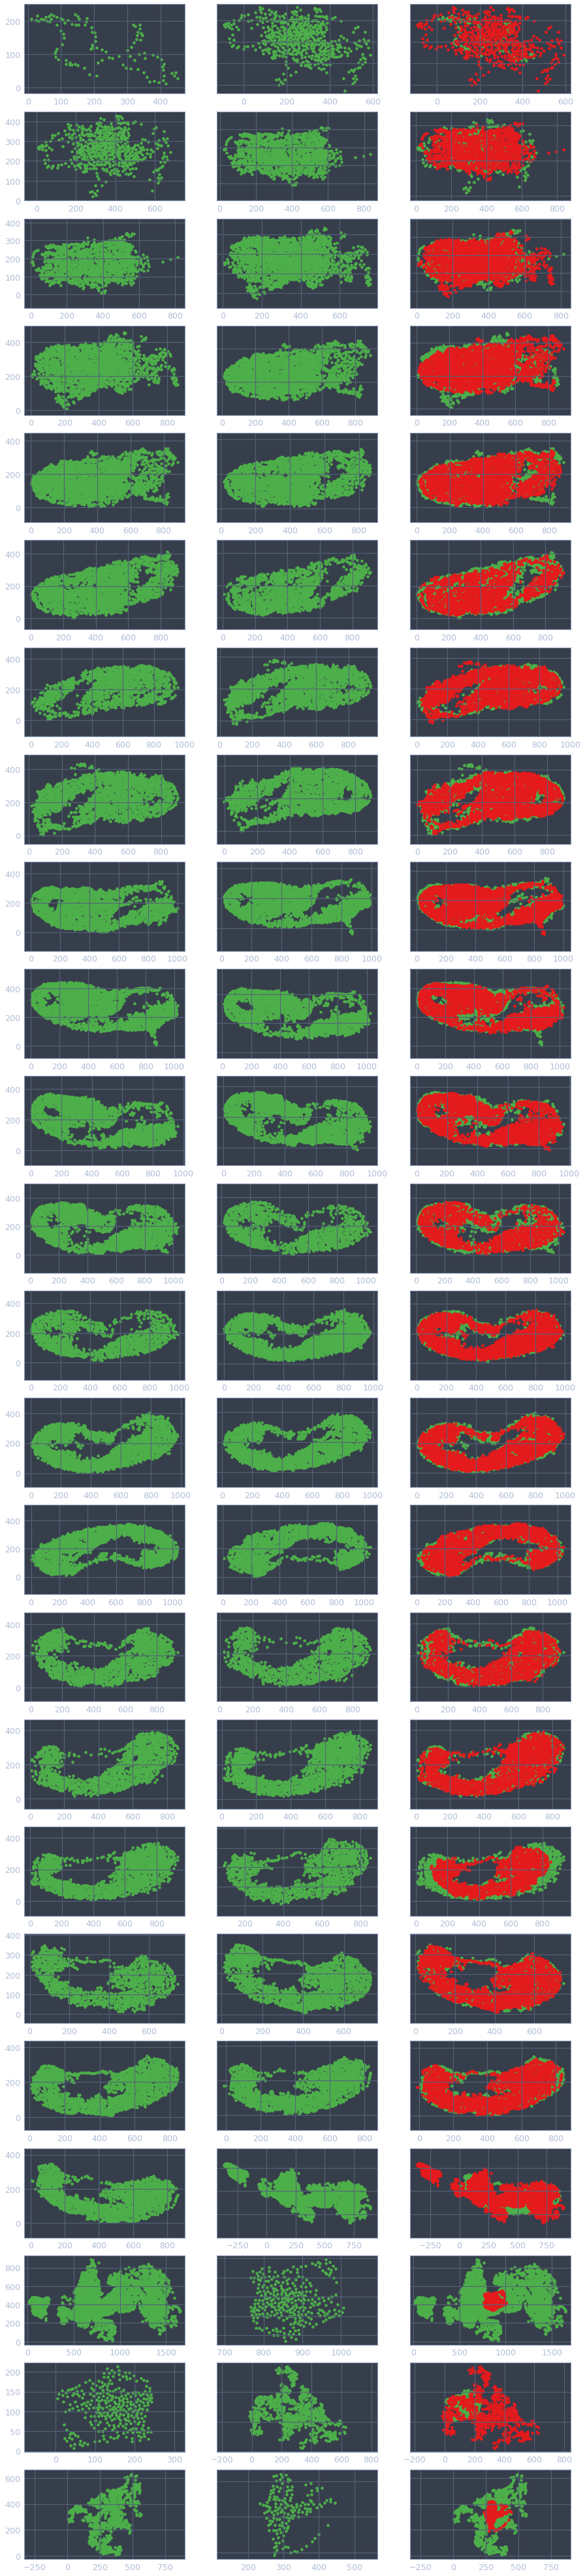

In [8]:
BAS_slices = [slice.copy() for slice in slices]
%matplotlib inline
fig, axs = plt.subplots(len(slices)-1, 3,figsize=(15,(len(slices)-1)*3))
for i in range(len(slices)-1):
    sliceA = BAS_slices[i]
    sliceB = BAS_slices[i + 1]
    sliceA_align, sliceB_align, P = morpho.morpho_align_pairwise(
                model=sliceA,
                model_ref=sliceB,
                spatial_key="spatial",
                key_added="align_spatial",
                select_high_exp_genes=False,
                normalize_c=True,
                normalize_g=False,
                mode="SN",
                max_iter=100,
                vis_optimiation=False,
                print_info=False,
                use_gpu = True,
                use_SVI = False,
                batch_size_param = 100,
                beta = 0.05,
                beta2 = 0.1,
                lambdaVF = 1e2,
                )
    plot_slices(sliceA_align, sliceB_align,axs[i],'align_spatial',slice_colors,20)


### Alignment with SVI on CPU

In [90]:
%matplotlib auto
sliceA_align_SVI, sliceB_align_SVI, P = morpho.morpho_align_pairwise(
            model=sliceA,
            model_ref=sliceB,
            spatial_key="spatial",
            key_added="align_spatial",
            select_high_exp_genes=False,
            normalize_c=True,
            normalize_g=True,
            mode="SN",
            max_iter=100,
            vis_optimiation=False,
            print_info=True,
            use_gpu = False,
            use_SVI = True,
            batch_size_param = 100,
            beta = 0.05,
            )


Using matplotlib backend: agg
|-----> Start alignment based on morph, mode: SN.
|-----> Filtered all samples for common genes. There are 8528 common genes.
|-----> Coordinates normalization param:
|-----------> Mean: [505.83183581 188.15169629], [439.41382695 190.4425908 ].
|-----------> Scale: 289.4297987404491.
|-----> Gene expression normalization param:
|-----------> Mean: [0.0011422  0.00599657 0.         ... 0.02141633 0.0011422  0.0134209 ].
|-----------> Scale: 30.891525316487883.
|-----> [Start morpho alignment] in progress: 100.0000%
|-----> [Start morpho alignment] finished [2.4712s]


### Exact Alignment on GPU

In [100]:
%matplotlib auto
sliceA_align_GPU, sliceB_align_GPU, P = morpho.morpho_align_pairwise(
            model=sliceA,
            model_ref=sliceB,
            spatial_key="spatial",
            key_added="align_spatial",
            select_high_exp_genes=False,
            normalize_c=True,
            normalize_g=True,
            mode="SN",
            max_iter=100,
            vis_optimiation=True,
            print_info=True,
            use_gpu = True,
            use_SVI = False,
            batch_size_param = 100,
            beta = 0.05,
            )


Using matplotlib backend: agg
|-----> Start alignment based on morph, mode: SN.
|-----> Filtered all samples for common genes. There are 8528 common genes.
|-----> Coordinates normalization param:
|-----------> Mean: tensor([505.8318, 188.1517], device='cuda:0', dtype=torch.float64), tensor([439.4138, 190.4426], device='cuda:0', dtype=torch.float64).
|-----------> Scale: 289.4297987404491.
|-----> Gene expression normalization param:
|-----------> Mean: tensor([0.0011, 0.0060, 0.0000,  ..., 0.0214, 0.0011, 0.0134], device='cuda:0').
|-----------> Scale: 30.891529083251953.
|-----> [Start morpho alignment] in progress: 100.0000%
|-----> [Start morpho alignment] finished [0.8640s]


MovieWriter ffmpeg unavailable; using Pillow instead.


### Alignment with SVI on GPU

In [92]:
%matplotlib auto
sliceA_align_GPU_SVI, sliceB_align_GPU_SVI, P = morpho.morpho_align_pairwise(
            model=sliceA,
            model_ref=sliceB,
            spatial_key="spatial",
            key_added="align_spatial",
            select_high_exp_genes=False,
            normalize_c=True,
            normalize_g=True,
            mode="SN",
            max_iter=100,
            vis_optimiation=False,
            print_info=True,
            use_gpu = True,
            use_SVI = True,
            batch_size_param = 100,
            beta = 0.05,
            )


Using matplotlib backend: agg
|-----> Start alignment based on morph, mode: SN.
|-----> Filtered all samples for common genes. There are 8528 common genes.
|-----> Coordinates normalization param:
|-----------> Mean: tensor([505.8318, 188.1517], device='cuda:0', dtype=torch.float64), tensor([439.4138, 190.4426], device='cuda:0', dtype=torch.float64).
|-----------> Scale: 289.4297987404491.
|-----> Gene expression normalization param:
|-----------> Mean: tensor([0.0011, 0.0060, 0.0000,  ..., 0.0214, 0.0011, 0.0134], device='cuda:0').
|-----------> Scale: 30.891529083251953.
|-----> [Start morpho alignment] in progress: 100.0000%
|-----> [Start morpho alignment] finished [0.8051s]


### Paste on GPU

In [35]:
import paste as pst
import ot
import time
sliceA_paste, sliceB_paste = slices[i].copy(), slices[i+1].copy()
t1 = time.time()
pi = pst.pairwise_align(sliceA_paste, sliceB_paste, use_gpu=True,backend = ot.backend.TorchBackend())
# pi = pst.pairwise_align(sliceA_paste, sliceB_paste, use_gpu=False)
pis = [pi]
new_slices = pst.stack_slices_pairwise([sliceA_paste, sliceB_paste], pis)
t2 = time.time()
print("Paste costs {:.5} s".format(t2-t1))

gpu is available, using gpu.
Paste costs 3.9425 s
